## Problem: Intersection Plot

Write a function `get_hyperplane(b, bias=0, box=[0,0,1,1])` that computes a hyperplane in 2 dimensions, restricted to a box. More specifically, given input consisting of:

1. a vector $b \in \mathbb{R}^2$
2. a bias term $b_0 \in \mathbb{R}$
3. a box $[l_x, l_y, u_x, u_y]$ — i.e. a rectangle in $\mathbb{R}^2$, specified by a 4-tuple:

$$
[l_x, l_y, u_x, u_y] \leftrightsquigarrow [l_x, u_x] \times [l_y, u_y] = \left\{ \begin{pmatrix} x \\ y \end{pmatrix} \in \mathbb{R}^2 \mid l_x \le x \le u_x \wedge l_y \le y \le u_y  \right\}
$$

Compute the intersection points of the hyperplane $H = \{ x \mid \langle x, b \rangle + b_0 = 0 \}$ with the edges of the box. Return either:

1. Two empty vectors if the intersection is empty
2. Two vectors $X, Y$ of length 2 containing the $x$ and $y$ values of the intersection points.


Test your code by executing:

```python
from numpy.random import randn
from matplotlib import pyplot as plt
box = lx, ly, ux, uy = [-5, -2, 3, 4]
fig, ax  = plt.subplots(figsize=(16, 6))
ax.set_xlim(lx-2, ux+2)
ax.set_ylim(ly-2, uy+2)
ax.plot([lx, lx, ux, ux, lx], [ly, uy, uy, ly, ly], '--k')
for k in range(20):
    X, Y = get_hyperplane(randn(2), bias=randn(1), box=box)
    ax.plot(X, Y)


If you did everything correct the result should look like the following picture.

[ 3. -5.] [-0.23513282  0.08549293]
[ 3. -5.] [0.03505518 0.30714919]
[-0.92733055 -1.04416324] [-2.  4.]
[0.27371844 1.0214629 ] [-2.  4.]
[-1.89800207  3.        ] [-2.          3.54749099]
[ 3. -5.] [-1.01674446  1.68386058]
[0.26522042 2.4634331 ] [-2.  4.]
[ 0.21987328 -0.53301669] [-2.  4.]
[ 0.62017812 -5.        ] [-2.          2.68245312]
[ 2.00309044 -0.99437236] [-2.  4.]
[-2.57747647  3.        ] [-2.          1.22113391]
[ 3. -5.] [1.1836629 1.8561111]
[ 2.58473315 -4.61454956] [-2.  4.]
[ 3. -5.] [-0.20530233  0.59224083]
[-3.52754589  3.        ] [-2.          2.57781448]
[ 3. -5.] [-0.01981608  1.94821158]
[ 1.13946998 -0.83749404] [-2.  4.]
[-0.98204715  3.        ] [-2.          2.11825218]
[-5.  3.] [-1.11147682  1.26834997]
[-0.92438901  1.73956891] [-2.  4.]


C:\Users\vitus\AppData\Local\Temp\ipykernel_30744\845192094.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[0] = (Y[0] - intercept)/slope
C:\Users\vitus\AppData\Local\Temp\ipykernel_30744\845192094.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[1] = (Y[1] - intercept)/slope


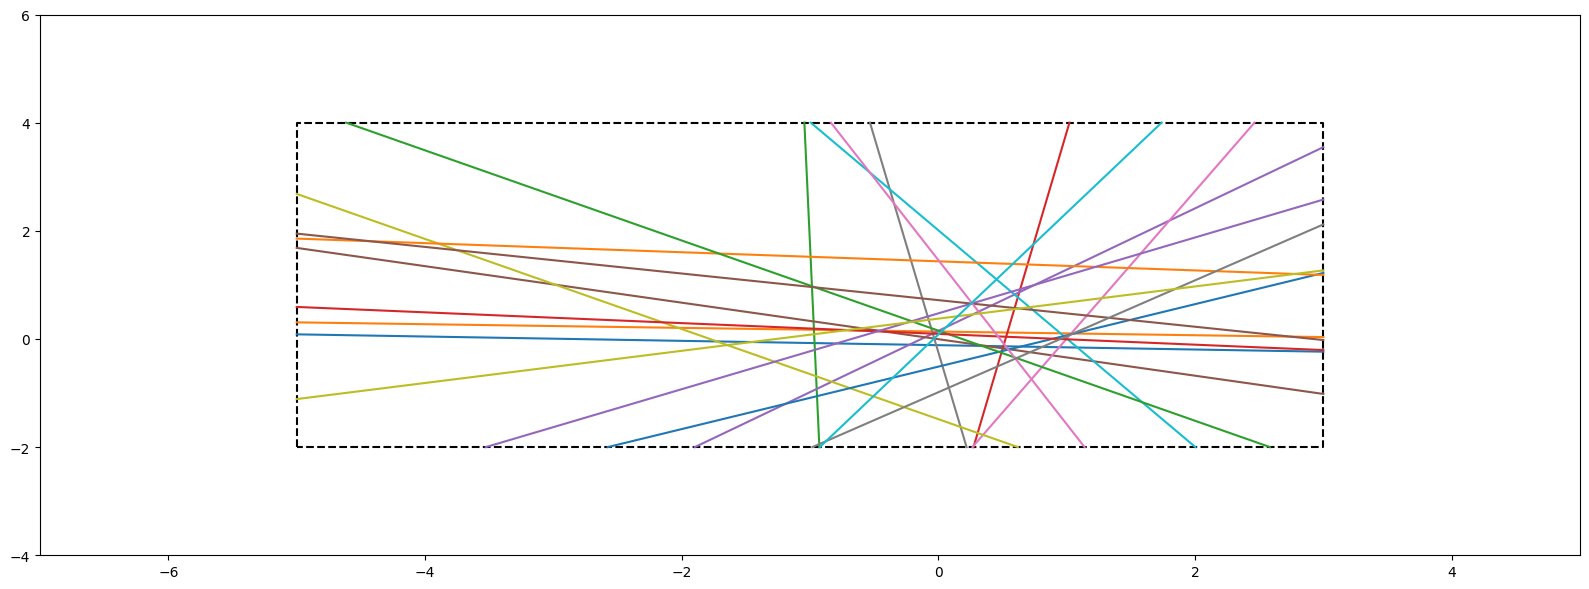

In [42]:
%matplotlib inline
import numpy as np
from numpy.random import randn
from matplotlib  import pyplot as plt

def get_hyperplane(vec, bias=0, box=[0,0,1,1]):
    """
    vec: either vector length 2
    Plot hyperplane in R^2, restricted to given box.
    H = {x| b0 + b1*x1 + b2*x2 = 0 }
    """
    # your code here
    if vec is None:
        return None, None
    
    # get box coordinates
    lx, ly, ux, uy = box
    # get the slope and intercept
    slope = -vec[0]/vec[1]
    intercept = -bias/vec[1]

    # get the x coordinates
    X = np.array([lx, ux], dtype=float)
    # get the y coordinates
    Y = slope*X + intercept
    # get the y coordinates within the box
    if Y[0] > Y[1]:
        Y[0], Y[1] = Y[1], Y[0]
        X[0], X[1] = X[1], X[0]
    
    if Y[0] < ly:
        Y[0] = ly
        X[0] = (Y[0] - intercept)/slope
    if Y[1] > uy:
        Y[1] = uy
        X[1] = (Y[1] - intercept)/slope

    # return None, None if the line is outside the box
    if X[0] > ux or X[1] < lx:
        return None, None
    return X, Y
    

# use the code below to validate your plot
box = lx, ly, ux, uy = [-5, -2, 3, 4]
fig, ax  = plt.subplots(figsize=(16, 6))
ax.set_xlim(lx-2, ux+2)
ax.set_ylim(ly-2, uy+2)
ax.plot( [lx, lx, ux, ux, lx], [ly, uy, uy, ly, ly], '--k' )
for k in range(20):
    X, Y = get_hyperplane(randn(2), bias=randn(1), box=box)
    print(X, Y)
    ax.plot(X, Y)
plt.tight_layout()
plt.savefig("lines_in_box.pdf")